<a href="https://colab.research.google.com/github/Saibharaths21/Student-Performance-Prediction/blob/main/student_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score

df = pd.read_csv('/content/student-data.csv')
dfv = pd.read_csv('/content/student-data.csv')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/student-data.csv"  # Adjust the file path if necessary
df = pd.read_csv("/content/student-data.csv")

# Print missing values per column before imputation
print("Missing values per column before imputation:")
print(df.isnull().sum())

# Define numerical and categorical columns to impute
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures']
categorical_cols = ['address', 'famsize', 'Mjob', 'reason', 'schoolsup',
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 'romantic'

# Impute missing values in numerical columns with the mean value of each column
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values in categorical columns with the mode (most frequent value) of each column
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Print the cleaned dataset preview
print("\nCleaned dataset preview:")
print(df.head())

# Optionally, print the missing values per column after imputation to verify
print("\nMissing values per column after imputation:")
print(df.isnull().sum())


Missing values per column before imputation:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

Cleaned dataset preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   

In [ ]:
# mapping strings to numeric values:
def numerical_data():
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['sex'] = df['sex'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
    col = df['passed']
    del df['passed']
    df['passed'] = col


# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

In [ ]:
# All values in numerical after calling numerical_data() function
numerical_data()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,1,18,0,1,1,4,4,3,0,...,0,0,4,3,4,1,1,3,6,0
1,0,1,17,0,1,0,1,1,3,4,...,1,0,5,3,3,1,1,3,4,0
2,0,1,15,0,0,0,1,1,3,4,...,1,0,4,3,2,2,3,3,10,1
3,0,1,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,2,1
4,0,1,16,0,1,0,3,3,4,4,...,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,0,0,1,2,2,2,2,...,0,0,5,5,4,4,5,4,11,0
391,1,0,17,0,0,0,3,1,2,2,...,1,0,2,4,5,3,4,2,3,1
392,1,0,21,1,1,0,1,1,4,4,...,0,0,5,5,3,3,3,3,3,0
393,1,0,18,1,0,0,3,2,2,4,...,1,0,4,4,1,3,4,5,0,1


In [ ]:
# Let's scal our features
feature_scaling(df)

# Now we are ready for models training
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,1.0,0.059264,0.0,1.0,1.0,1.00,1.00,0.75,0.00,...,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.003882,0.0
1,0.0,1.0,0.013809,0.0,1.0,0.0,0.25,0.25,0.75,1.00,...,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.50,-0.022785,0.0
2,0.0,1.0,-0.077100,0.0,0.0,0.0,0.25,0.25,0.75,1.00,...,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.057215,1.0
3,0.0,1.0,-0.077100,0.0,1.0,0.0,1.00,0.50,0.25,0.50,...,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.00,-0.049451,1.0
4,0.0,1.0,-0.031646,0.0,1.0,0.0,0.75,0.75,1.00,1.00,...,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.00,-0.022785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,0.0,0.150173,0.0,0.0,1.0,0.50,0.50,0.50,0.50,...,0.0,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.070549,0.0
391,1.0,0.0,0.013809,0.0,0.0,0.0,0.75,0.25,0.50,0.50,...,1.0,0.0,0.25,0.75,1.00,0.50,0.75,0.25,-0.036118,1.0
392,1.0,0.0,0.195627,1.0,1.0,0.0,0.25,0.25,1.00,1.00,...,0.0,0.0,1.00,1.00,0.50,0.50,0.50,0.50,-0.036118,0.0
393,1.0,0.0,0.059264,1.0,0.0,0.0,0.75,0.50,0.50,1.00,...,1.0,0.0,0.75,0.75,0.00,0.50,0.75,1.00,-0.076118,1.0


In [ ]:
df.shape

(395, 31)

In [ ]:
df.dropna().shape # their is no null value "fortunately:)"

(395, 31)

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [ ]:
#plot of student status
dfv['passed'].value_counts()

,count
passed,
yes,265
no,130


Text(0.5, 1.0, 'Correlation Heatmap')

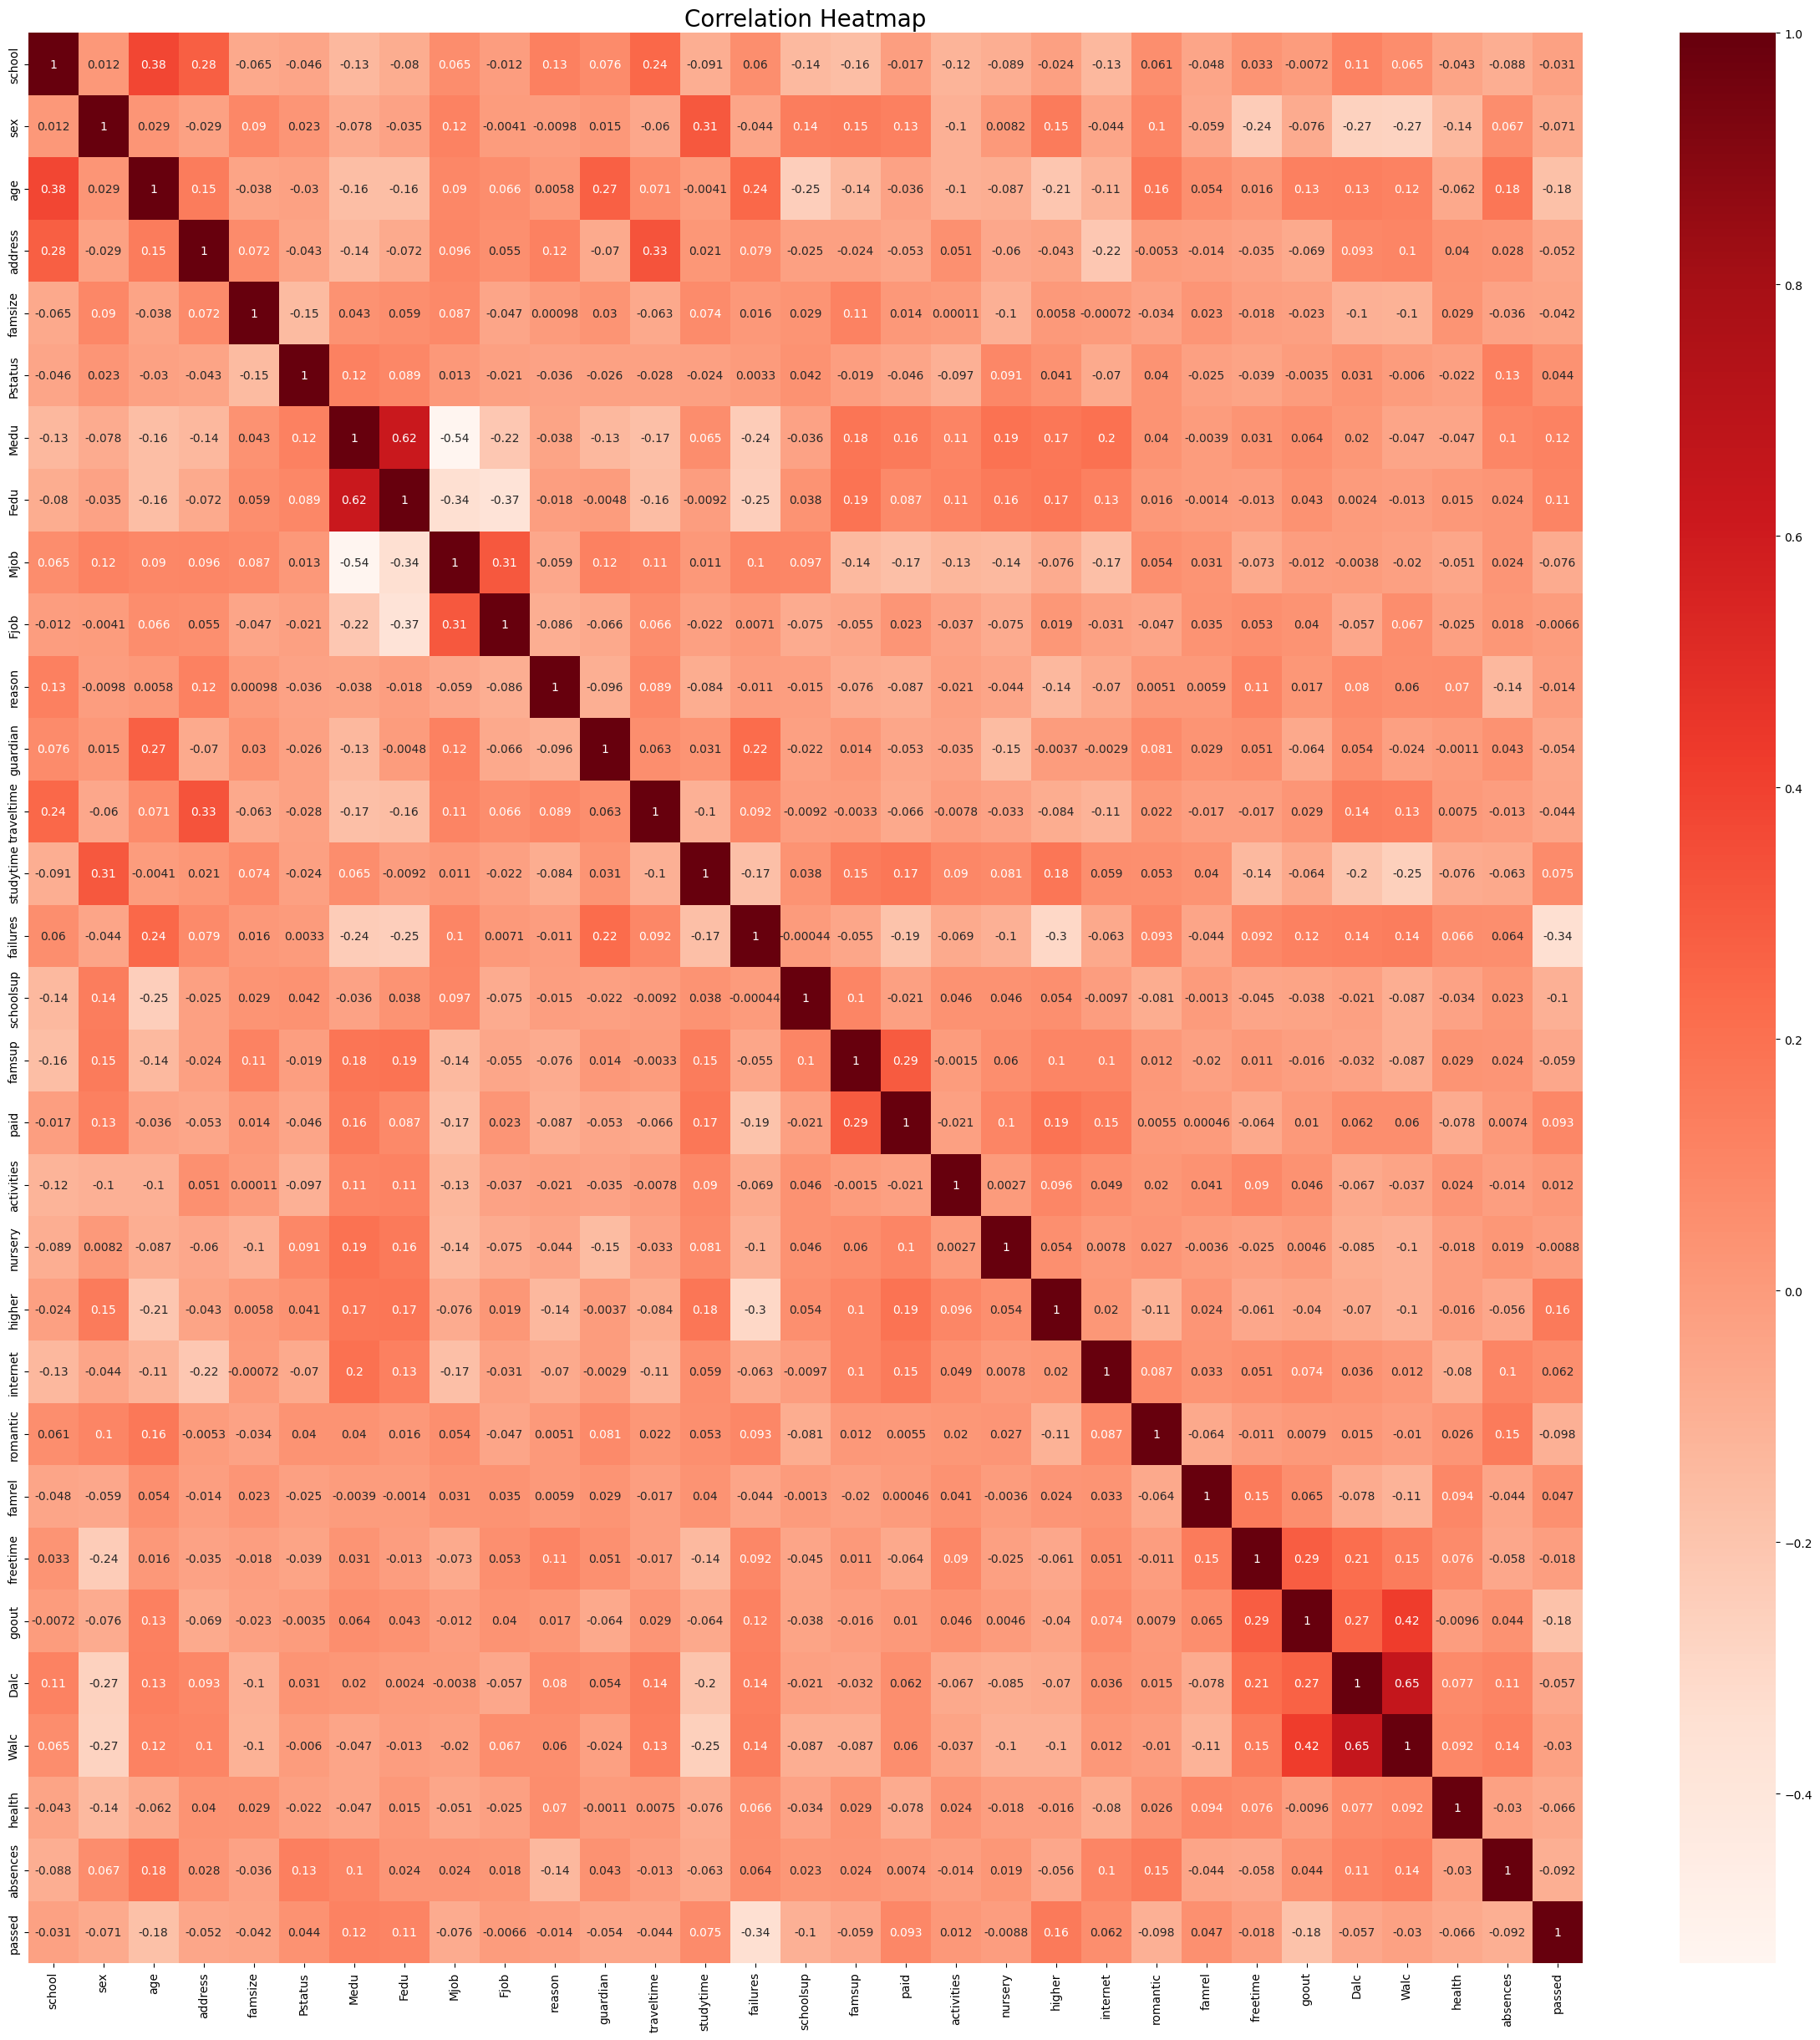

In [ ]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

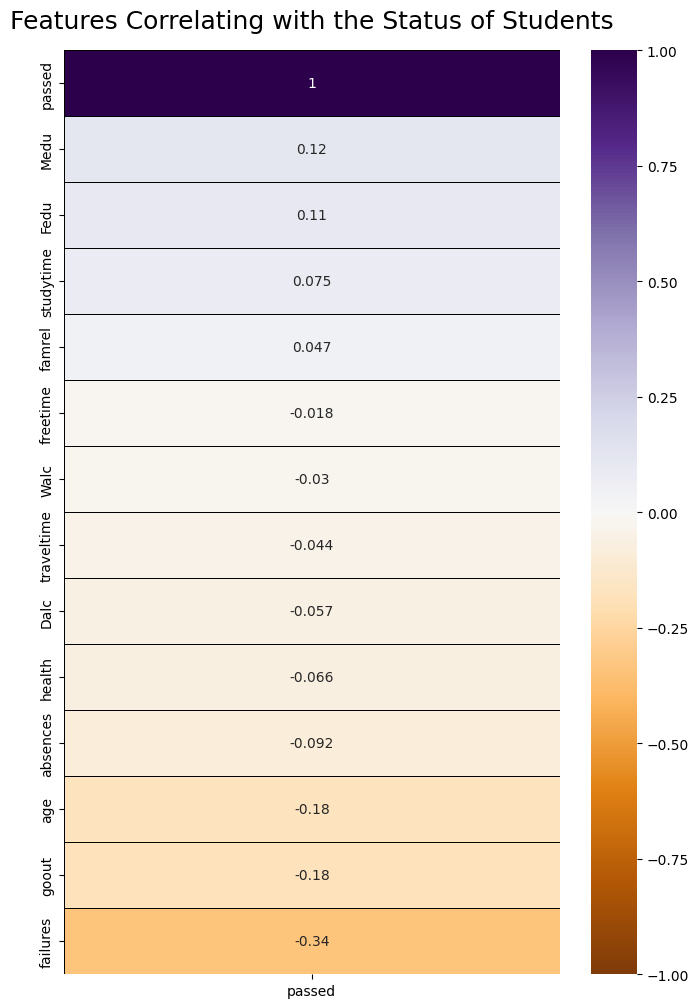

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Load your dataset here (replace with your actual file path)
df = pd.read_csv("/content/student-data.csv")

# Include 'passed' column in numerical features if it exists
if 'passed' in df.columns:
    #If 'passed' is categorical, convert it to numerical using Label Encoding
    if df['passed'].dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df['passed'] = le.fit_transform(df['passed'])

    numerical_df = df.select_dtypes(include=np.number) # Recalculate numerical_df

    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(numerical_df.corr()[['passed']].sort_values(by='passed', ascending=False),
                          vmin=-1, vmax=1, annot=True, cmap='PuOr', linewidths=0.5, linecolor='black')

    heatmap.set_title('Features Correlating with the Status of Students',
                      fontdict={'fontsize': 18}, pad=16)

    plt.show()
else:
    print("The 'passed' column is not found in the DataFrame.")

Original Dataset with Missing Values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences passed  
0       no       no       4         3      4    1    1      3        6     no  
1      yes       no       5         3      3    1    1      3        4     no  
2      yes       no       4         3      2    2    3      3       10    yes  
3      yes      yes       3         2      2    1    1      5        2    yes  
4       no       no       4         3      2    1    2      5        4    y

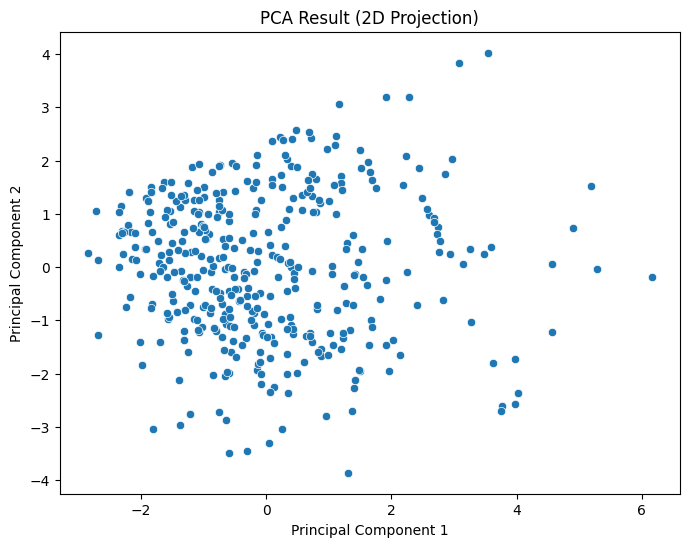

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/mnt/data/student-data.csv"
df = pd.read_csv("/content/student-data.csv")

# Display the first few rows of the dataset
print("Original Dataset with Missing Values:")
print(df.head())

# Handling Missing Values: Filling missing values with column mean
# Select only numeric columns for filling with mean
numeric_features = df.select_dtypes(include=[np.number])
df[numeric_features.columns] = numeric_features.fillna(numeric_features.mean())
# Apply fillna only to numeric features

# Selecting only numeric features for PCA
numeric_features = df.select_dtypes(include=[np.number])

# Standardizing the Data (PCA requires scaled data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a new DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the transformed dataset
print("\nDataset after PCA Transformation:")
print(pca_df.head())

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio of Each Principal Component:")
print(explained_variance)

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result (2D Projection)")
plt.show()

In [ ]:
# feature selection:  Correlation Matrix(Filter Methods)

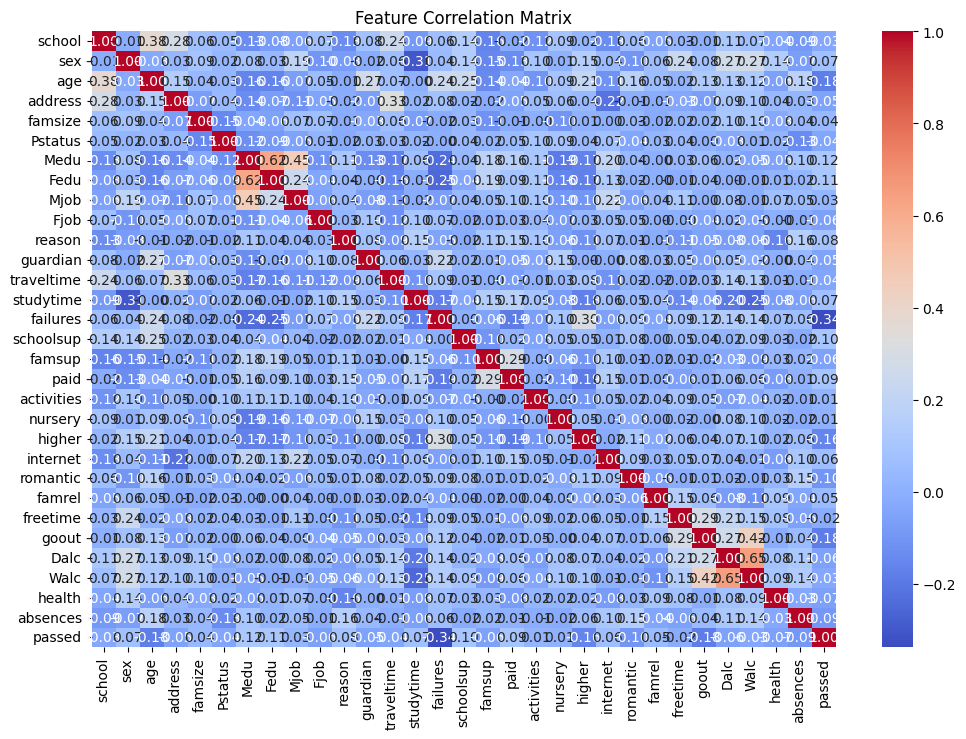

Selected Features after Correlation-based Feature Selection:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/mnt/data/student-data.csv"  # Update path if needed
df = pd.read_csv("/content/student-data.csv")

# Convert categorical data to numerical if not already done
df = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Select features with high correlation (threshold = 0.8)
threshold = 0.8
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Remove self-correlations (1.0 values)
corr_pairs = corr_pairs[corr_pairs < 1]

# Find highly correlated feature pairs
high_corr_features = set()
for (feature1, feature2), corr_value in corr_pairs.items():
    if corr_value > threshold:
        high_corr_features.add(feature2)  # Keep only one from correlated pairs

# Drop highly correlated features
df_selected = df.drop(columns=high_corr_features)

# Print the remaining selected features
print("Selected Features after Correlation-based Feature Selection:")
print(df_selected.columns)


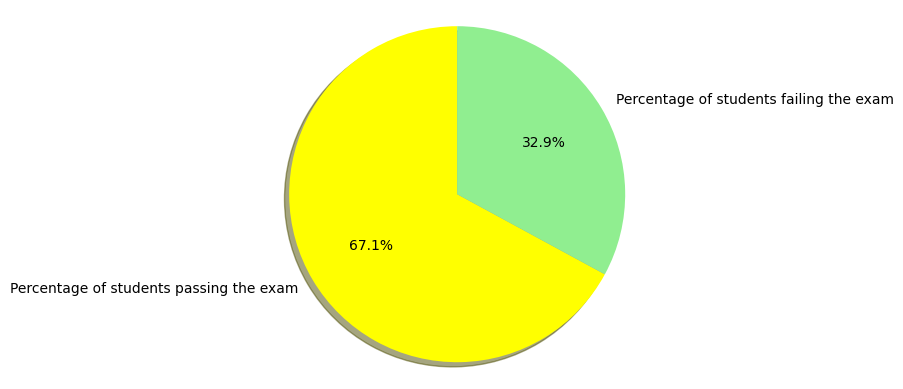

In [ ]:
import matplotlib.pyplot as plt  # Import the pyplot module from matplotlib

labels = 'Percentage of students passing the exam', 'Percentage of students failing the exam'
sizes = [265, 130]
colors = ['yellow', 'lightgreen']  # Slightly modified colors

fig1, ax1 = plt.subplots()  # Now plt is defined and can be used
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


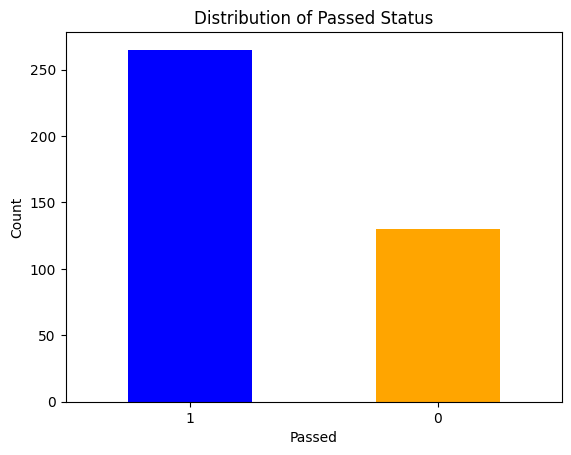

In [ ]:
df["passed"].value_counts().plot(kind="bar", color=["blue", "orange"])

plt.title("Distribution of Passed Status")
plt.xlabel("Passed")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep labels readable
plt.show()

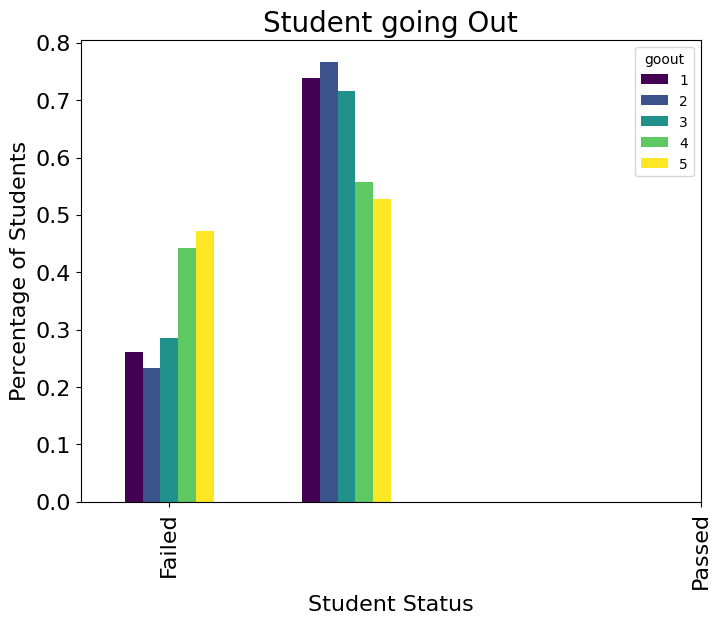

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define percentage function
perc = lambda col: col / col.sum()

# Updated index values
index = ['Failed', 'Passed']

# Crosstab for 'passed' and 'goout'
out_tab = pd.crosstab(index=df.passed, columns=df.goout)
out_perc = out_tab.apply(perc).reindex([0, 1])  # Ensure correct order

# Plot with new color scheme
out_perc.plot.bar(colormap="viridis", fontsize=16, figsize=(8, 6))

plt.title('Student going Out', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Student Status', fontsize=16)
plt.xticks(ticks=[0, 3], labels=index)  # Updating index labels on the x-axis

plt.show()


<Figure size 640x480 with 0 Axes>

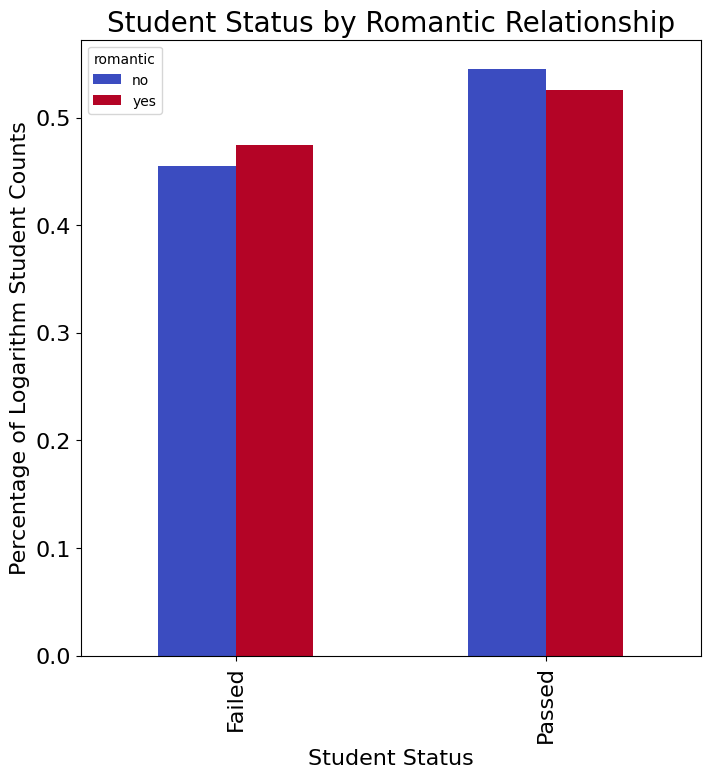

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define percentage function
perc = lambda col: col / col.sum()

# Crosstab and log transformation
romance_tab1 = pd.crosstab(index=df.passed, columns=df.romantic)
romance_tab = np.log(romance_tab1.replace(0, np.nan))  # Avoid log(0) errors
romance_perc = romance_tab.apply(perc).reindex([0, 1])

# Plot with a new color scheme
plt.figure()
romance_perc.plot.bar(colormap="coolwarm", fontsize=16, figsize=(8, 8))

plt.title('Student Status by Romantic Relationship', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Student Status', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Failed', 'Passed'])  # Updated labels

plt.show()


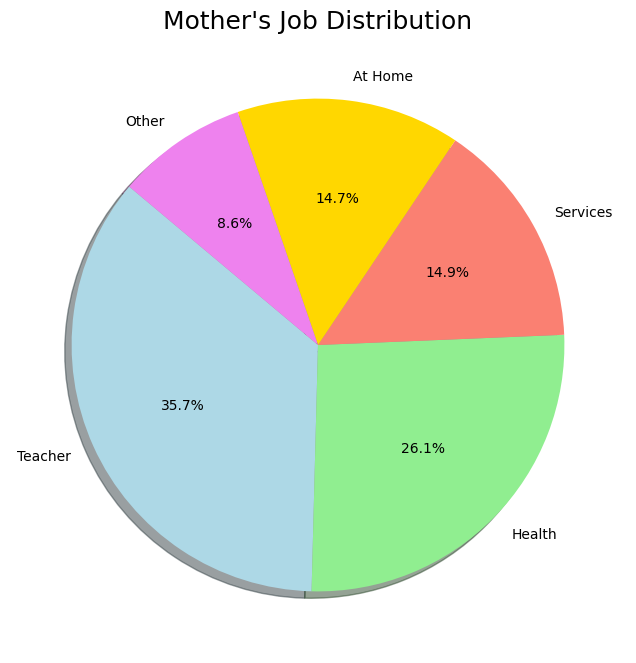

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas if not already imported

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame if different
dfv = pd.read_csv("/content/student-data.csv")  # Load your dataset

# Count occurrences of each mother's job
mjob_counts = dfv['Mjob'].value_counts()

# Define labels and custom colors
labels = ['Teacher', 'Health', 'Services', 'At Home', 'Other']
colors = ['lightblue', 'lightgreen', 'salmon', 'gold', 'violet']  # New color scheme

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(mjob_counts, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)

plt.title("Mother's Job Distribution", fontsize=18)
plt.show()

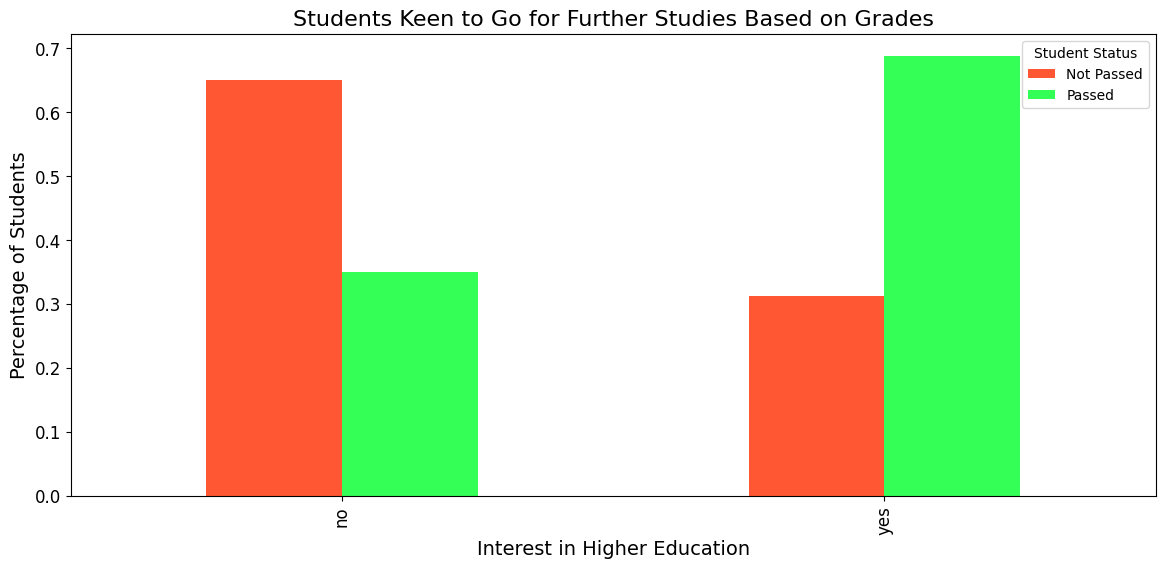

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/student-data.csv"
df = pd.read_csv("/content/student-data.csv")

# Ensure 'higher' and 'passed' columns exist
if "higher" in df.columns and "passed" in df.columns:
    df = df.dropna(subset=["passed"])  # Remove rows with missing 'passed' values
    df["passed"] = df["passed"].map({"no": 0, "yes": 1})

    # Create a crosstab for 'higher' education interest
    higher_tab = pd.crosstab(index=df["passed"], columns=df["higher"])

    # Calculate percentages
    perc = lambda col: col / col.sum()
    higher_perc = higher_tab.apply(perc)

    # Plot with bright colors
    bright_colors = ["#FF5733", "#33FF57"]  # Bright orange for "Not Passed", bright green for "Passed"
    higher_perc.T.plot(kind="bar", color=bright_colors, figsize=(14, 6), fontsize=12)

    # Set title and labels
    plt.title('Students Keen to Go for Further Studies Based on Grades', fontsize=16)
    plt.xlabel('Interest in Higher Education', fontsize=14)
    plt.ylabel('Percentage of Students', fontsize=14)
    plt.legend(["Not Passed", "Passed"], title="Student Status")

    # Display the plot
    plt.show()
else:
    print("The required columns ('passed' and 'higher') are missing from the dataset.")


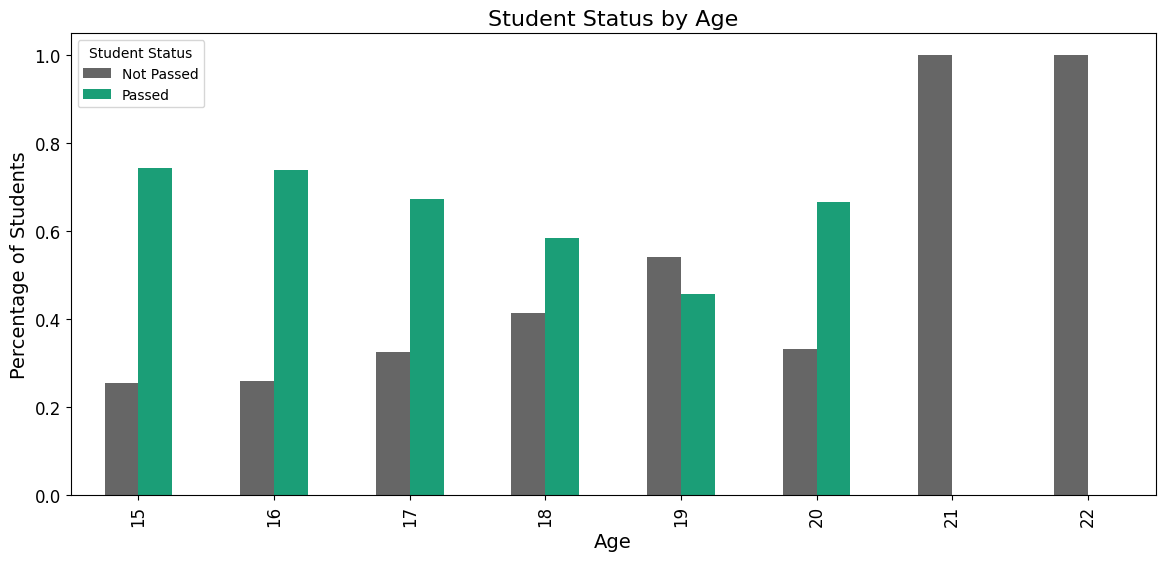

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from time import time
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Load the dataset
# Replace 'student-data.csv' with your actual file path
file_path = '/content/student-data.csv'
df = pd.read_csv('/content/student-data.csv')

# Convert 'passed' to numeric values (0 for 'no', 1 for 'yes')
df["passed"] = df["passed"].map({"no": 0, "yes": 1})

# Define percentage function
perc = lambda col: col / col.sum()

# Create a crosstab for 'passed' and 'age'
higher_tab = pd.crosstab(index=df["passed"], columns=df["age"])

# Calculate percentages and reindex for correct order
higher_perc = higher_tab.apply(perc).reindex([0, 1])

# Plot with a suitable colormap
higher_perc.T.plot(kind="bar", colormap="Dark2_r", figsize=(14, 6), fontsize=12)

# Set title and labels
plt.title('Student Status by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage of Students', fontsize=14)
plt.legend(["Not Passed", "Passed"], title="Student Status")

# Display the plot
plt.show()

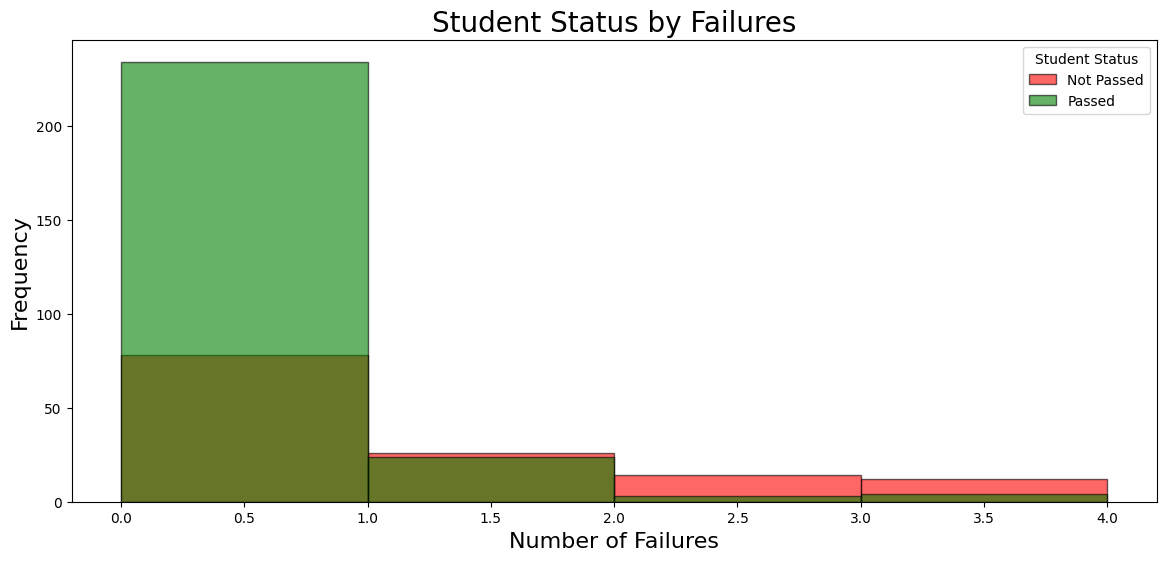

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/student-data.csv"
df = pd.read_csv("/content/student-data.csv")

# Ensure 'passed' and 'failures' columns exist
if "passed" in df.columns and "failures" in df.columns:
    df = df.dropna(subset=["passed"])  # Remove rows with missing 'passed' values
    df["passed"] = df["passed"].map({"no": 0, "yes": 1})

    # Define percentage function
    perc = lambda col: col / col.sum()

    # Create a crosstab for 'failures' count
    fail_tab = pd.crosstab(index=df["passed"], columns=df["failures"])

    # Calculate percentages
    fail_perc = fail_tab.apply(perc)

    # Plot histogram
    plt.figure(figsize=(14, 6))
    for status, color in zip([0, 1], ["red", "green"]):  # Red for "Not Passed", Green for "Passed"
        plt.hist(df[df["passed"] == status]["failures"], bins=range(df["failures"].max() + 2),
                 alpha=0.6, color=color, edgecolor="black", label="Not Passed" if status == 0 else "Passed")

    # Set title and labels
    plt.title('Student Status by Failures', fontsize=20)
    plt.xlabel('Number of Failures', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.legend(title="Student Status")

    # Display the plot
    plt.show()
else:
    print("The required columns ('passed' and 'failures') are missing from the dataset.")


Text(0, 0.5, 'Percentage of Student')

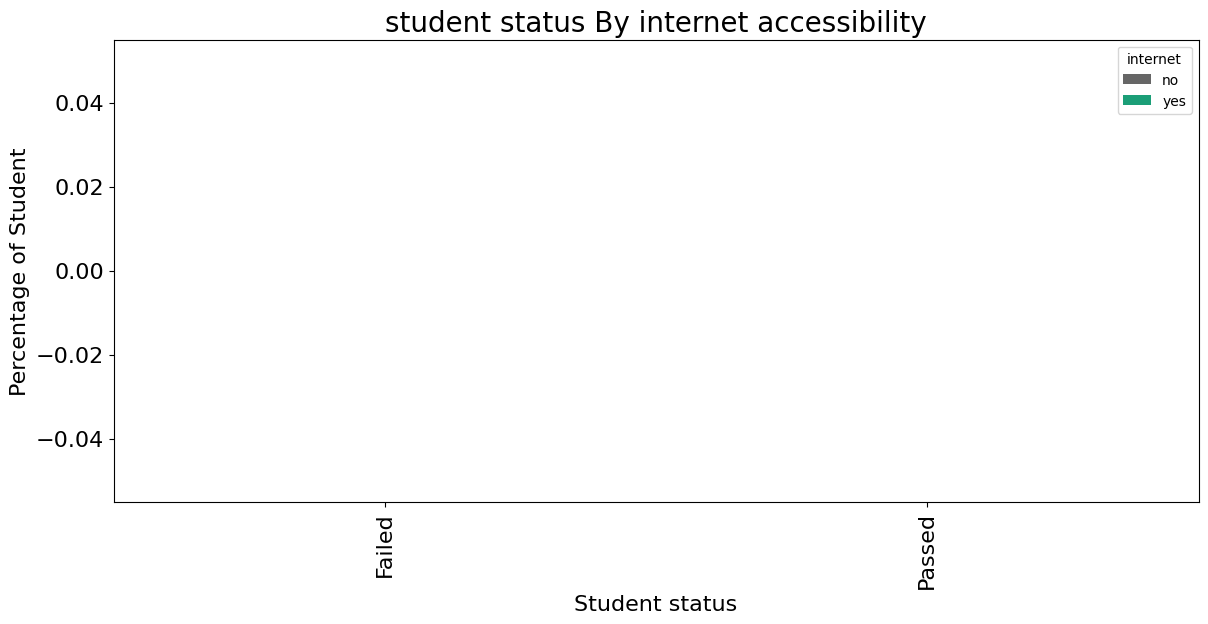

In [ ]:
alc_tab = pd.crosstab(index=df.passed, columns=df.internet)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By internet accessibility', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

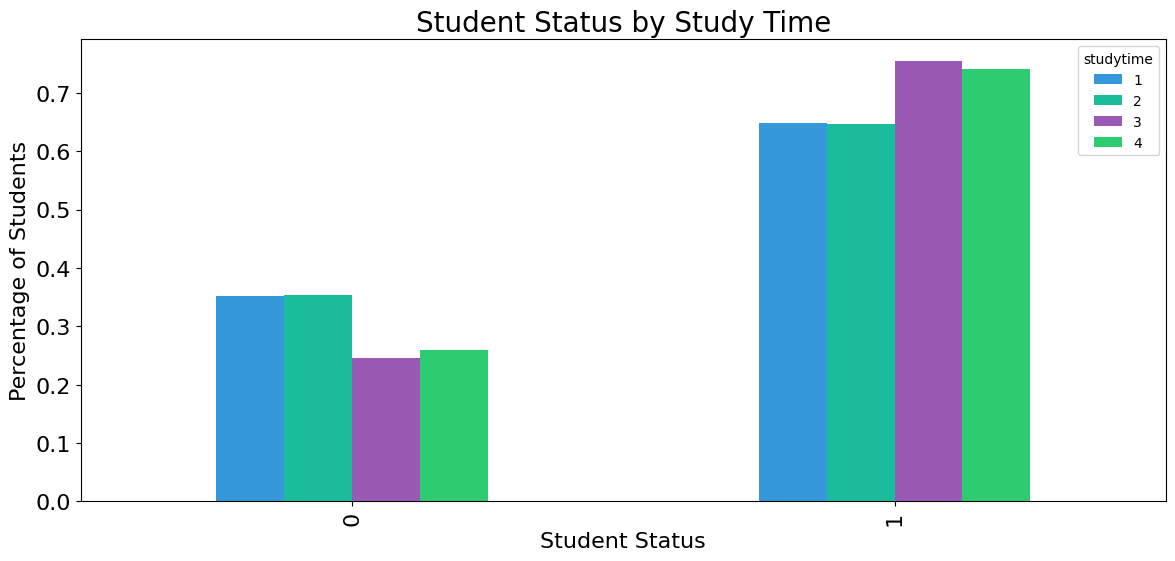

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab for 'passed' and 'studytime'
stu_tab = pd.crosstab(index=df.passed, columns=df.studytime)

# Define percentage function
perc = lambda col: col / col.sum()

# Calculate percentages
stu_perc = stu_tab.apply(perc)

# Plot bar graph with cool colors
cool_colors = ["#3498db", "#1abc9c", "#9b59b6", "#2ecc71"]  # Cool shades of blue, green, and purple
stu_perc.plot.bar(color=cool_colors, figsize=(14, 6), fontsize=16)

# Set title and labels
plt.title('Student Status by Study Time', fontsize=20)
plt.xlabel('Student Status', fontsize=16)
plt.ylabel('Percentage of Students', fontsize=16)

# Display the plot
plt.show()

Text(0, 0.5, 'Percentage of Student')

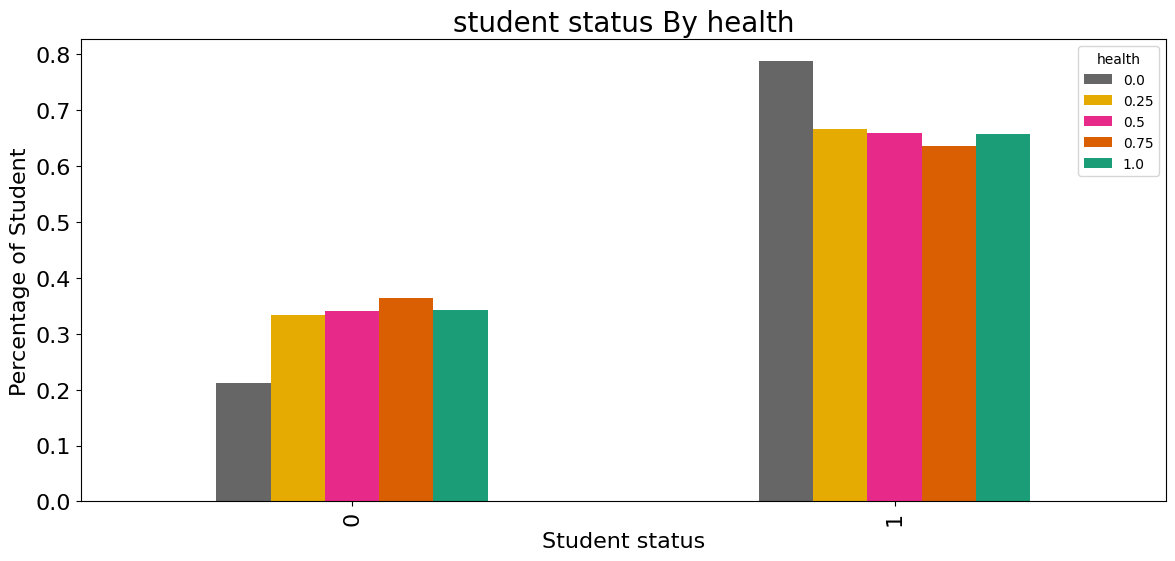

In [ ]:
he_tab = pd.crosstab(index=df.passed, columns=df.health)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By health', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [ ]:
####  support vector machine

In [ ]:
#ensemble method:Bagging

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace with actual dataset)
# Assuming 'target' is the label column
df = pd.read_csv('/content/student-data.csv')  # Replace with actual file path

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through columns and encode string values to numerical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['passed'])  # Features
y = df['passed']  # Labels

# ... (rest of your code remains the same)

# Function to get optimal C value (Modify logic as needed)
def optimal_C_value():
    return 1.0  # Default value (Modify based on tuning strategy)

# Function to display results
def showResults(accuracy, training_time, predictions, model_name):
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Training Time: {training_time}")

# Initialize values
optimal_split_state1 = 0
maxAccuracy = 0
maxF1 = 0

# Define max iterations for tuning
max_iteration = 0  # Change to a number like 2000 for hyperparameter tuning

if max_iteration != 0:
    print('---------------------------------------- Hyperparameter tuning starts ----------------------------------------\n\n')

# Loop for tuning hyperparameters (if enabled)
for k in range(max_iteration):
    print(f"Iteration: {k}, Current Accuracy: {maxAccuracy:.2f}%, Current F1: {maxF1:.2f}", end="\r")

    # Generate a random split state
    split_state = np.random.randint(1, 1000000000)

    # Splitting dataset
    X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=split_state)
    X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=split_state)

    # Get optimal C value
    optimal_C = optimal_C_value()

    # Train SVM model with linear kernel
    linear_clf = SVC(C=optimal_C, kernel='linear')

    # Measure training time
    tic = time.time()
    linear_clf.fit(X_train, y_train)
    toc = time.time()
    time1 = f"{round(1000 * (toc - tic))}ms"

    # Evaluate performance
    y_linear = linear_clf.predict(X_test)
    linear_f1 = f1_score(y_test, y_linear, average='macro')
    linear_accuracy = accuracy_score(y_test, y_linear) * 100

    # Update best results
    if linear_accuracy > maxAccuracy and linear_f1 > maxF1:
        maxAccuracy = linear_accuracy
        maxF1 = linear_f1
        optimal_split_state1 = split_state

    # Stop early if threshold met
    if maxAccuracy >= 86 and maxF1 >= 80:
        break

# Use pre-tuned split state
-------------------



# Train final SVM model
linear_clf = SVC(C=optimal_C, kernel='linear')
tic = time.time()
linear_clf.fit(X_train, y_train)
toc = time.time()
time1 = f"{round(1000 * (toc - tic))}ms"

# Predict & evaluate
y_linear = linear_clf.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_linear) * 100

# Display results
showResults(linear_accuracy, time1, y_linear, 'SVM linear kernel')

if max_iteration != 0:
    print('\n\n\n--------------------------- Process Ended ---------------------------\n\n\n')



SVM linear kernel Results:
Accuracy: 77.22%
Training Time: 53ms


In [ ]:
#guassian kernel

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/content/student-data.csv')

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through columns and encode string values to numerical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=['passed'])
y = df['passed']

# Function to display results
def showResults(accuracy, training_time, predictions, model_name):
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Training Time: {training_time}")

# Function to find optimal C and gamma for Gaussian kernel
def optimal_C_gamma_values(X_train, y_train):
    """
    Finds the optimal C and gamma values using GridSearchCV.
    """
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=3, cv=5)
    grid.fit(X_train, y_train)
    return grid.best_params_['C'], grid.best_params_['gamma']


optimal_split_state3 = 0
maxAccuracy = 0
maxF1 = 0

max_iteration = 0  # Set to a higher value (e.g., 500) to enable hyperparameter tuning

if max_iteration != 0:
    print('----------------------------------------------Hyperparameters tuning starts'\
          '--------------------------------------------\n\n')

for k in range(max_iteration):
    print('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+', Current f1 '+str(maxF1), end="\r")

    split_state = np.random.randint(1, 100000000) - 1

    # Split data using train_test_split
    X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=split_state)
    X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=split_state)


    # Get optimal C and gamma
    optimal_C, optimal_gamma = optimal_C_gamma_values(X_train, y_train)

    # Train and evaluate the model
    gauss_clf = SVC(C=optimal_C, kernel='rbf', gamma=optimal_gamma)

    tic = time.time()
    gauss_clf.fit(X_train, y_train)
    toc = time.time()
    time3 = str(round(1000 * (toc - tic))) + "ms"

    y_gauss = gauss_clf.predict(X_test)
    gauss_f1 = f1_score(y_test, y_gauss, average='macro')
    gauss_accuracy = accuracy_score(y_test, y_gauss) * 100

    if gauss_accuracy > maxAccuracy and gauss_f1 > maxF1:
        maxAccuracy = gauss_accuracy
        maxF1 = gauss_f1
        optimal_split_state3 = split_state

# If max_iteration is 0, use a predefined split state
if max_iteration == 0:
    optimal_split_state3 = 93895097  # Or any other desired value

# Final model training and evaluation using the optimal split state
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=optimal_split_state3)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=optimal_split_state3)

optimal_C, optimal_gamma = optimal_C_gamma_values(X_train, y_train)

gauss_clf = SVC(C=optimal_C, kernel='rbf', gamma=optimal_gamma)

tic = time.time()
gauss_clf.fit(X_train, y_train)
toc = time.time()
time3 = str(round(1000 * (toc - tic))) + "ms"

y_gauss = gauss_clf.predict(X_test)
gauss_accuracy = accuracy_score(y_test, y_gauss) * 100

showResults(gauss_accuracy, time3, y_gauss, 'SVM gaussian kernel')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.688 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.688 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.702 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.702 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.681 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.688 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.688 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.702 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.702 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.681 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.688 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

In [ ]:
#svm polynomial kernel

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE


def showResults(accuracy, training_time, predictions, model_name):
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Training Time: {training_time}")


# Load your dataset
df = pd.read_csv('/content/student-data.csv')

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through columns and encode string values to numerical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=['passed'])
y = df['passed']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Hyperparameter Tuning using GridSearchCV with StratifiedKFold
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Use StratifiedKFold for cross-validation to maintain class proportions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(SVC(), param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Get the best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Split data into training and testing sets (using the best random_state if found)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


# Train the best SVM model
tic = time.time()
best_svm_model.fit(X_train, y_train)
toc = time.time()
training_time = str(round(1000 * (toc - tic))) + "ms"

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

# Display results
showResults(accuracy, training_time, y_pred, 'SVM polynomial kernel (Improved)')

Fitting 5 folds for each of 18 candidates, totalling 90 fits

SVM polynomial kernel (Improved) Results:
Accuracy: 83.02%
Training Time: 58ms


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 6.0 MB/s eta 0:00:00


In [ ]:
#radial basis function kernel(rbf)

In [ ]:
import pandas as pd
import numpy as np
import time
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/student-data.csv')

# One-Hot Encoding for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('passed')  # Exclude target variable

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Merge processed data
df_numeric = df.drop(columns=categorical_cols)
df_final = pd.concat([df_numeric, encoded_df], axis=1)

# Convert target variable ('passed') to binary
df_final['passed'] = df_final['passed'].map({'yes': 1, 'no': 0})

# Outlier Removal using IQR
Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_final = df_final[~((df_final < lower_bound) | (df_final > upper_bound)).any(axis=1)]

# Feature Engineering
df_final['alcohol_use'] = df_final['Dalc'] + df_final['Walc']
df_final['study_fail_interaction'] = df_final['studytime'] * df_final['failures']

# Define features (X) and target (y)
X = df_final.drop(columns=['passed'])
y = df_final['passed']

# Apply Standard Scaling (Instead of MinMaxScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE with lower resampling
smote = SMOTE(sampling_strategy=0.7, random_state=42)  # Generates fewer synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Optuna Optimization for Hyperparameters
def objective(trial):
    C = 1.0  # Fixed value instead of searching
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])  # Removed 'poly' and 'sigmoid'
    gamma = "scale"  # Fixed gamma

    model = SVC(C=C, kernel=kernel, gamma=gamma)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in cv.split(X_resampled, y_resampled):
        X_train, X_val = X_resampled[train_idx], X_resampled[val_idx]
        y_train, y_val = y_resampled[train_idx], y_resampled[val_idx]
        model.fit(X_train, y_train)
        scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)  # Reduced trials further

# Train the best SVM model
best_params = study.best_params
best_svm_model = SVC(**best_params)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled  # Increased test size
)

# Train best model
tic = time.time()
best_svm_model.fit(X_train, y_train)
toc = time.time()
training_time = str(round(1000 * (toc - tic))) + "ms"

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Calculate new accuracy
new_accuracy = accuracy_score(y_test, y_pred) * 100

# Display results
print(f"\nOptimized SVM Results:")
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {new_accuracy:.2f}%")
print(f"Training Time: {training_time}")


[I 2025-03-29 03:21:13,970] A new study created in memory with name: no-name-88227995-c477-4a7f-b552-14f32643b0b3
[I 2025-03-29 03:21:13,993] Trial 0 finished with value: 0.9413702239789196 and parameters: {'kernel': 'rbf'}. Best is trial 0 with value: 0.9413702239789196.
[I 2025-03-29 03:21:14,011] Trial 1 finished with value: 0.9413702239789196 and parameters: {'kernel': 'rbf'}. Best is trial 0 with value: 0.9413702239789196.
[I 2025-03-29 03:21:14,036] Trial 2 finished with value: 0.7951251646903822 and parameters: {'kernel': 'linear'}. Best is trial 0 with value: 0.9413702239789196.
[I 2025-03-29 03:21:14,079] Trial 3 finished with value: 0.9413702239789196 and parameters: {'kernel': 'rbf'}. Best is trial 0 with value: 0.9413702239789196.
[I 2025-03-29 03:21:14,116] Trial 4 finished with value: 0.9413702239789196 and parameters: {'kernel': 'rbf'}. Best is trial 0 with value: 0.9413702239789196.



Optimized SVM Results:
Best Parameters: {'kernel': 'rbf'}
Accuracy: 90.48%
Training Time: 2ms


[I 2025-03-29 03:25:07,606] A new study created in memory with name: no-name-ee87a4eb-b48c-4db5-9fea-8a6f1f19820e
[I 2025-03-29 03:25:07,655] Trial 0 finished with value: 0.7951251646903822 and parameters: {'kernel': 'linear'}. Best is trial 0 with value: 0.7951251646903822.
[I 2025-03-29 03:25:07,681] Trial 1 finished with value: 0.7951251646903822 and parameters: {'kernel': 'linear'}. Best is trial 0 with value: 0.7951251646903822.
[I 2025-03-29 03:25:07,711] Trial 2 finished with value: 0.7951251646903822 and parameters: {'kernel': 'linear'}. Best is trial 0 with value: 0.7951251646903822.
[I 2025-03-29 03:25:07,741] Trial 3 finished with value: 0.7951251646903822 and parameters: {'kernel': 'linear'}. Best is trial 0 with value: 0.7951251646903822.
[I 2025-03-29 03:25:07,765] Trial 4 finished with value: 0.9413702239789196 and parameters: {'kernel': 'rbf'}. Best is trial 4 with value: 0.9413702239789196.


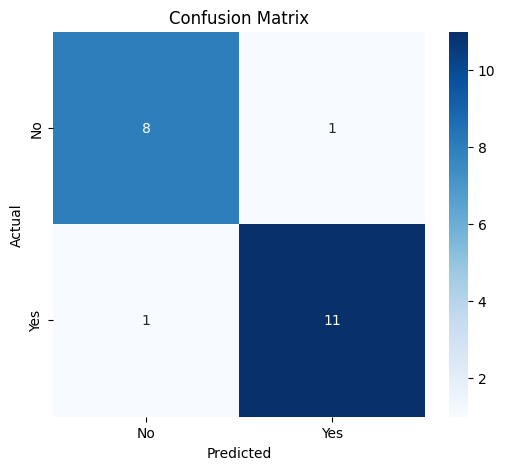

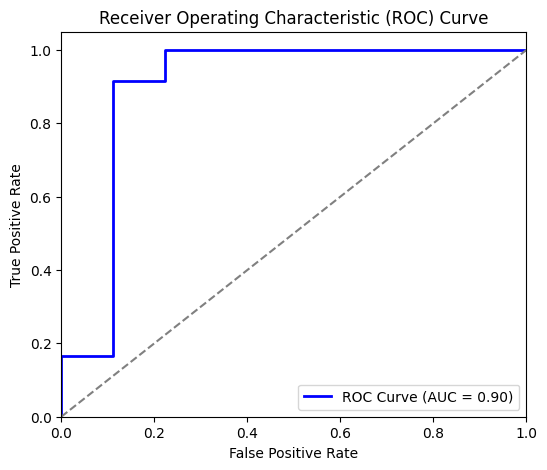


Optimized SVM Results:
Best Parameters: {'kernel': 'rbf'}
Accuracy: 90.48%
Training Time: 7ms


In [ ]:
import pandas as pd
import numpy as np
import time
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('/content/student-data.csv')

# One-Hot Encoding for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('passed')  # Exclude target variable

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Merge processed data
df_numeric = df.drop(columns=categorical_cols)
df_final = pd.concat([df_numeric, encoded_df], axis=1)

# Convert target variable ('passed') to binary
df_final['passed'] = df_final['passed'].map({'yes': 1, 'no': 0})

# Outlier Removal using IQR
Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_final = df_final[~((df_final < lower_bound) | (df_final > upper_bound)).any(axis=1)]

# Feature Engineering
df_final['alcohol_use'] = df_final['Dalc'] + df_final['Walc']
df_final['study_fail_interaction'] = df_final['studytime'] * df_final['failures']

# Define features (X) and target (y)
X = df_final.drop(columns=['passed'])
y = df_final['passed']

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE with lower resampling
smote = SMOTE(sampling_strategy=0.7, random_state=42)  # Generates fewer synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Optuna Optimization for Hyperparameters
def objective(trial):
    C = 1.0  # Fixed value instead of searching
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])  # Removed 'poly' and 'sigmoid'
    gamma = "scale"  # Fixed gamma

    model = SVC(C=C, kernel=kernel, gamma=gamma, probability=True)  # Enabled probability=True for ROC curve
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Added shuffle=True
    scores = []

    for train_idx, val_idx in cv.split(X_resampled, y_resampled):
        X_train, X_val = X_resampled[train_idx], X_resampled[val_idx]
        y_train, y_val = y_resampled[train_idx], y_resampled[val_idx]
        model.fit(X_train, y_train)
        scores.append(accuracy_score(y_val, model.predict(X_val)))

    return np.mean(scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)  # Reduced trials further

# Train the best SVM model
best_params = study.best_params
best_svm_model = SVC(**best_params, probability=True)  # Enabled probability=True for ROC

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled  # Increased test size
)

# Train best model
tic = time.time()
best_svm_model.fit(X_train, y_train)
toc = time.time()
training_time = str(round(1000 * (toc - tic))) + "ms"

# Make predictions
y_pred = best_svm_model.predict(X_test)
y_probs = best_svm_model.predict_proba(X_test)[:, 1]  # Get probability estimates for ROC

# Calculate Accuracy
new_accuracy = accuracy_score(y_test, y_pred) * 100

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display results
print(f"\nOptimized SVM Results:")
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {new_accuracy:.2f}%")
print(f"Training Time: {training_time}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv('/content/student-data.csv')  # Update file path

# Encode categorical features
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['passed'])  # Features
y = df['passed']  # Target

# Standardize features for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Linear SVM
linear_clf = SVC(kernel='linear', C=1.0)
linear_clf.fit(X_train, y_train)

# Get SVM coefficients (only for linear kernel)
coefs = linear_clf.coef_.flatten()

# Function to find most influential features
def factors(coefs, num_features, mode, df):
    feature_names = df.drop(columns=['passed']).columns  # Exclude target column
    factor_values = dict(zip(feature_names, coefs))  # Map features to their weights

    # Get top positive or negative features
    if mode == 'max':
        return sorted(factor_values, key=factor_values.get, reverse=True)[:num_features]
    elif mode == 'min':
        return sorted(factor_values, key=factor_values.get)[:num_features]
    else:
        raise ValueError("Mode should be 'max' or 'min'.")

# Function to format results
def column_to_string(columns, mode):
    title = "Factors Helping Students to Succeed" if mode == 'max' else "Factors Leading to Failure"
    print(f"\n{title}:")
    for col in columns:
        print(f"- {col}")

# Factors helping students to succeed
column_to_string(factors(coefs, 5, 'max', df), 'max')

# Factors leading students to failure
column_to_string(factors(coefs, 5, 'min', df), 'min')



Factors Helping Students to Succeed:
- higher
- paid
- Walc
- guardian
- freetime

Factors Leading to Failure:
- failures
- goout
- famsup
- Mjob
- age


In [ ]:
## K-fold validation

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
file_path = "/content/student-data.csv"
df = pd.read_csv("/content/student-data.csv")

# Assuming the target variable is in a column named 'target'
# Replace 'target' with the name of your target column if different
X = df.drop('passed', axis=1)
y = df['passed']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and encode string values to numerical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Initialize the classifier (using logistic regression as an example)
model = LogisticRegression(max_iter=1000)

# Define K-Fold cross-validation with 5 splits (adjust n_splits as needed)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross validation and obtain the scores (accuracy by default)
scores = cross_val_score(model, X, y, cv=kf)

print("K-Fold Cross Validation Scores:", scores)
print("Average Score:", scores.mean())

K-Fold Cross Validation Scores: [0.75949367 0.6835443  0.65822785 0.74683544 0.64556962]
Average Score: 0.6987341772151898


In [ ]:
#logistic regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(





*Accuracy is: 81.5126050420168
*f1 score is:  0.7600806451612903


 *the ROC curve: 


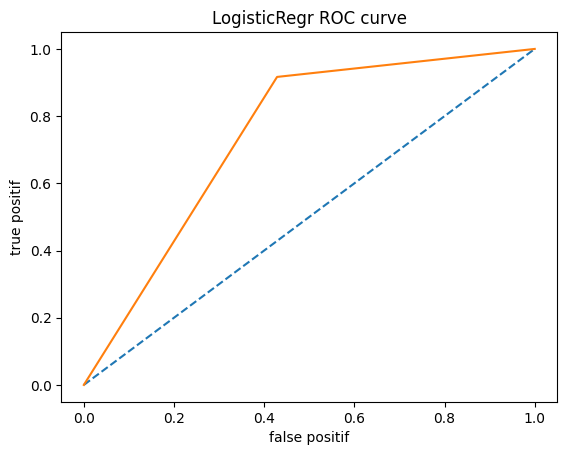

 *the confusion matrix 


<Axes: >

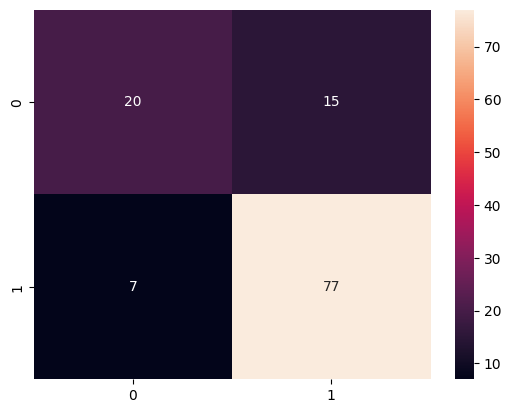

In [ ]:
#still improving the accuracy of the model
from sklearn.metrics import accuracy_score, f1_score # Import accuracy_score and f1_score
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
import random
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    logisticRegr = LogisticRegression(C=1)
    logisticRegr.fit(x_train,y_train)
    y_pred=logisticRegr.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)*100 # Now accuracy_score is defined

    if (accuracy>maxAccuracy and f1>maxF1):
        maxF1 = f1
        maxAccuracy = accuracy
        optimal_state = split_state


optimal_state = 85491961
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=optimal_state)
logisticRegr = LogisticRegression(C=1)
logisticRegr.fit(x_train,y_train)
y_pred=logisticRegr.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)*100 # Now accuracy_score is defined
print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

yt_lg,yp_lg = y_test,y_pred
#ploting the roc_curve

print ( '\n\n *the ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='LogisticRegr')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('LogisticRegr ROC curve')
p=plt.show()


#visualizig the confusion matrix:

print (' *the confusion matrix ')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
#KNN

In [ ]:
#define data
y=df.passed
target=["passed"]
x = df.drop(target,axis = 1 )




*Accuracy is: 78.99159663865547
*f1 score is:  0.6787603930461072
random_state is  71027464


 *the ROC curve: 


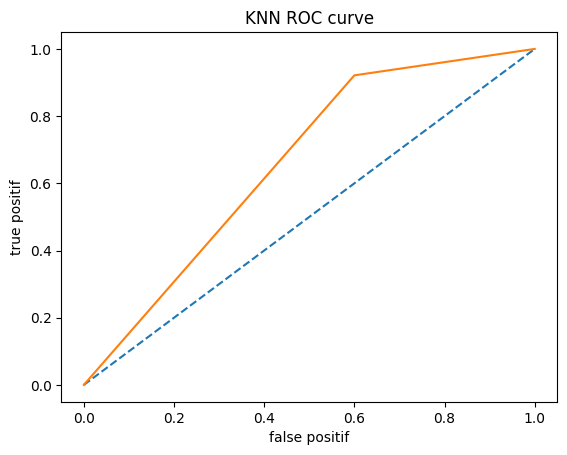

 *the confusion matrix 


<Axes: >

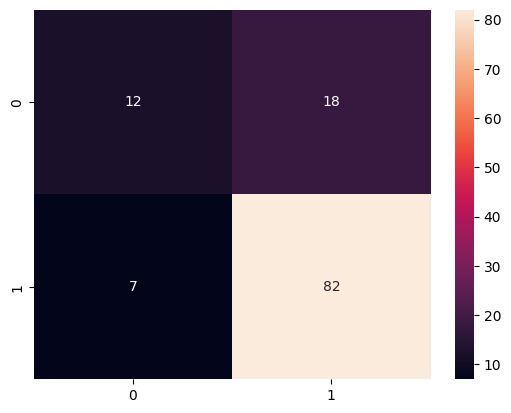

In [ ]:
#define data
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (rest of your code)
max_iteration = 0
maxF1 = 0
maxAccuracy = 0
optimal_state = 0
for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+ ', Current f1 : '+str(maxF1), end="\r")
    split_state = np.random.randint(1,100000000)-1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=split_state)
    KNN = KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)*100

    if (accuracy>maxAccuracy and f1>maxF1):
        maxF1 = f1
        maxAccuracy = accuracy
        optimal_state = split_state

optimal_state = 71027464

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=optimal_state)
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)*100
print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

print ('random_state is ',optimal_state)


#ploting the roc_curve

print ( '\n\n *the ROC curve: ')

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='knn')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('KNN ROC curve')
p=plt.show()

yt_knn,yp_knn= y_test,y_pred
#visualizig the confusion matrix:

print (' *the confusion matrix ')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)


In [ ]:
#further trying to increase the accuracy

In [ ]:
#voting classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize the data (important for Logistic Regression, SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with more iterations
logistic = LogisticRegression(max_iter=1000, solver='saga')
logistic.fit(X_train_scaled, y_train)

# Train SVM
svm = SVC(probability=True)  # Required for soft voting
svm.fit(X_train_scaled, y_train)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Create Voting Classifier (Hard Voting because RidgeClassifier is removed)
voting_clf = VotingClassifier(
    estimators=[
        ('logistic', logistic),
        ('svm', svm),
        ('knn', knn),
        ('rf', rf),
        ('dt', dt)
    ],
    voting='soft'  # Switch to 'hard' if RidgeClassifier is required
)

# Train the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = voting_clf.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)


Voting Classifier Accuracy: 0.6974789915966386


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('logistic', logistic),
        ('svm', svm),
        ('knn', knn),
        ('rf', rf),
        ('dt', dt)
    ],
    final_estimator=RidgeClassifier()
)
stacking_clf.fit(X_train_scaled, y_train)


StackingClassifier(estimators=[('logistic', LogisticRegression(max_iter=1000)),
                               ('svm',
                                SVC(class_weight='balanced', probability=True)),
                               ('knn', KNeighborsClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=RidgeClassifier())

In [ ]:
#hyperparametering  all techniques

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np

# Handle Class Imbalance
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# --------------------------------------
# Decision Tree - Hyperparameter Tuning
# --------------------------------------
dt_params = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train_balanced, y_train_balanced)
dt_best = dt_grid.best_estimator_

y_pred_dt = dt_best.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# --------------------------------------
# Random Forest - Hyperparameter Tuning
# --------------------------------------
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, 30]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train_balanced, y_train_balanced)
rf_best = rf_grid.best_estimator_

y_pred_rf = rf_best.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# --------------------------------------
# Ridge Classifier - Hyperparameter Tuning
# --------------------------------------
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(RidgeClassifier(), ridge_params, cv=5)
ridge_grid.fit(X_train_balanced, y_train_balanced)
ridge_best = ridge_grid.best_estimator_

y_pred_ridge = ridge_best.predict(X_test_scaled)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

# Print all improved accuracies
print(f"Optimized Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Optimized Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Optimized Ridge Classifier Accuracy: {accuracy_ridge:.4f}")


Optimized Decision Tree Accuracy: 0.6555
Optimized Random Forest Accuracy: 0.6891
Optimized Ridge Classifier Accuracy: 0.7059


In [ ]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize models
logistic = LogisticRegression(max_iter=500, random_state=42)
ridge = RidgeClassifier()
svm = SVC()
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Train models
logistic.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
gbm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)

# Create Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('logistic', logistic),
        ('ridge', ridge),
        ('svm', svm),
        ('gbm', gbm),
        ('rf', rf),
        ('dt', dt),
        ('knn', knn)
    ],
    voting='hard'  # Hard voting to avoid predict_proba() issue with RidgeClassifier
)

# Train the combined model
voting_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_voting = voting_clf.predict(X_test_scaled)

# Accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Combined Model Accuracy (Logistic, Ridge, SVM, GBM, RF, DT, KNN): {accuracy_voting:.4f}")


Combined Model Accuracy (Logistic, Ridge, SVM, GBM, RF, DT, KNN): 0.6723
